In [12]:
#First prepare our data
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 10000

# Create circles 
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [13]:
print(f"First 5 X features:\n{X[:5]}")
print(f"\nFirst 5 y labels:\n{y[:5]}")

First 5 X features:
[[ 0.0464692   0.82477834]
 [ 1.00506323 -0.43335153]
 [-0.58348442  0.79452834]
 [ 0.98478298 -0.32517879]
 [ 0.82993028 -0.54722305]]

First 5 y labels:
[1 0 0 0 0]


In [14]:
#Make dataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1" : X[:, 0],
        "X2": X[:, 1],
        "label": y
        })
circles.head(10)

,X1,X2,label
0,0.046469,0.824778,1
1,1.005063,-0.433352,0
2,-0.583484,0.794528,0
3,0.984783,-0.325179,0
4,0.829930,-0.547223,0
5,-0.133929,0.776249,1
6,0.779197,0.645811,0
7,0.722955,0.173831,1
8,-0.121807,0.796951,1
9,0.849529,0.505678,0


In [15]:
# Check different labels
circles.label.value_counts()

label
1    5000
0    5000
Name: count, dtype: int64

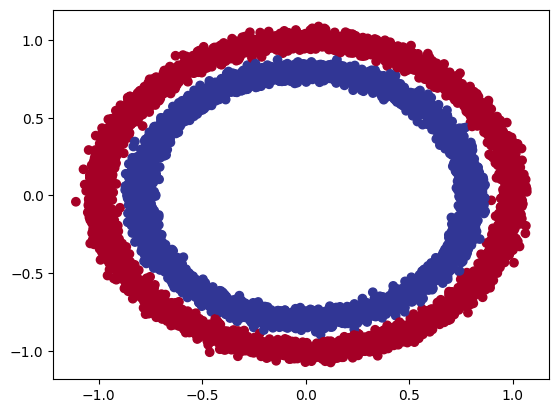

In [16]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)

In [17]:
# Check the shapes of our features and labels
X.shape, y.shape

((10000, 2), (10000,))

In [18]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]
print(f"Value for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sampe of X: {X_sample.shape} and the same for y: {y_sample.shape} ")

Value for one sample of X: [0.0464692  0.82477834] and the same for y: 1
Shapes for one sampe of X: (2,) and the same for y: () 


In [19]:
# Turn data into tensors
# Otherwise this causes issues with computations later on
import torch
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# View the first five samples
X[:5], y[:5]

(tensor([[ 0.0465,  0.8248],
         [ 1.0051, -0.4334],
         [-0.5835,  0.7945],
         [ 0.9848, -0.3252],
         [ 0.8299, -0.5472]]),
 tensor([1., 0., 0., 0., 0.]))

In [20]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

len(X_train), len(y_train), len(X_test), len(y_test)

(8000, 8000, 2000, 2000)

In [21]:
from torch import nn

#Make device agnostic code
device = "mps" if torch.backends.mps.is_available() else "cpu"
device

'mps'

In [22]:
# 1. Construct a model class that subclasses nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 nn.Linearlayers capable of handling the shapes of our data
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features (X), produces 5 features
        self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features (layer_1), produces 1 feature (y)
        
    # 3. Define a forward method containing the forward pass computation
    # Return the output of layer_2 a s.ngle feature, the same shape as y
    def forward(self, x):
        return self.layer_2(self.layer_1(x)) # computation goes through layer_1 first then output of layer_1 goes to layer_2
    
    ''' Return function can also be defined like this
    def forward(self, x):
        x = self.layer_1(x)
        x = self.layer_2(x)
        return x
        '''
        
    # 4. Create an instance of the model and send it to target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [23]:
# We could define the same model using nn.Sequential Sequantial performs forward pass in order they appear
model_1 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)
model_1

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [26]:
# Make predictions without training
untrained_predictions = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_predictions)}, Shape: {untrained_predictions.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_predictions[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

untrained_sequential_predictions = model_1(X_test.to(device))
print(f"Length of predictions: {len(untrained_sequential_predictions)}, Shape: {untrained_sequential_predictions.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_sequential_predictions[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")


Length of predictions: 2000, Shape: torch.Size([2000, 1])
Length of test samples: 2000, Shape: torch.Size([2000])

First 10 predictions:
tensor([[-0.2387],
        [-0.1989],
        [-0.2058],
        [-0.2347],
        [-0.2588],
        [-0.2110],
        [-0.2195],
        [-0.2173],
        [-0.2280],
        [-0.2614]], device='mps:0', grad_fn=<SliceBackward0>)

First 10 test labels:
tensor([1., 1., 0., 1., 0., 1., 1., 1., 1., 1.])
Length of predictions: 2000, Shape: torch.Size([2000, 1])
Length of test samples: 2000, Shape: torch.Size([2000])

First 10 predictions:
tensor([[ 0.2673],
        [ 0.5001],
        [ 0.2125],
        [ 0.0129],
        [ 0.1107],
        [ 0.2075],
        [ 0.1254],
        [ 0.1403],
        [ 0.0496],
        [-0.1010]], device='mps:0', grad_fn=<SliceBackward0>)

First 10 test labels:
tensor([1., 1., 0., 1., 0., 1., 1., 1., 1., 1.])


In [27]:
# Create a loss fnuction
# loss_fn = nn.BCELoss() # BCELoss = no sigmoid built-in
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = with sigmoid built-in

# Create an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

In [29]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred.sum().item()) # torch.eq() calculates where to tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

In [ ]:
# View the first 5 ouputs of the forward pass on the test data